<a href="https://colab.research.google.com/github/sahilparmar4/LGMVIP-DataScience/blob/main/Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author:** Sahil Parmar

# **Problem Statement:** As a security or defense analyst you have to find hot zones suffering from global terrorism 

## Import Necessary libraries


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Load the dataset

In [98]:
terrorism = pd.read_excel("/content/drive/MyDrive/LGM VIP/globalterrorismdb_0718dist.xlsx")
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Basic Information about dataset

In [99]:
print("Shape of dataset:", terrorism.shape)

Shape of dataset: (181691, 135)


In [100]:
print("Columns which are present in dataset:\n", terrorism.columns)

Columns which are present in dataset:
 Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [101]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [102]:
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [103]:
terrorism.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,0.070646,0.002019,0.026215,-0.016789,0.298888,0.041344,0.093720,-0.082972,0.137743,0.074173,0.071982,0.189245,0.079080,0.048798,-0.019084,0.097623,0.111425,-0.082822,0.156170,0.090551,0.039081,0.040647,-0.066449,-0.177867,0.017939,-0.137408,0.428397,0.141600,0.110578,0.033917,0.038996,-0.318032,-0.146094,0.398728,-0.011716,0.101733,0.101045,0.041027,0.081357,0.090000,-0.138596,0.027110,0.015351,-0.013808,0.027579,0.015282,-0.029348,0.027904,-0.278927,-0.150677,-0.013498,-0.010146,0.006369,-0.010082,-0.493414,-0.169859,-0.241986,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,0.070659,0.001995,0.026211,-0.016784,0.298920,0.041367,0.093736,-0.082963,0.137736,0.074153,0.072177,0.189454,0.079082,0.048794,-0.019068,0.097552,0.111364,-0.082784,0.155939,0.090345,0.038941,0.040656,-0.066417,-0.177591,0.017944,-0.137459,0.428278,0.141486,0.110542,0.034143,0.039172,-0.318815,-0.145529,0.398227,-0.011737,0.101727,0.101036,0.040990,0.081342,0.090267,-0.138298,0.026855,0.015341,-0.013828,0.027563,0.015273,-0.029357,0.027879,-0.278916,-0.150690,-0.013490,-0.010159,0.006342,-0.010093,-0.493378,-0.169931,-0.241764,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012477,-0.011762,-0.004422,-0.002845,0.003071,0.006705,-0.029027,-0.039298,-0.000948,0.001508,-0.004838,0.019584,0.016365,-0.006315,0.059489,0.052698,0.036580,-0.004460,-0.008286,-0.054490,-0.001661,0.014354,0.019890,0.023083,0.013361,-0.040736,-0.040042,0.147710,-0.156620,0.144738,0.007863,0.002142,0.000581,0.009567,-0.020514,-0.086445,-0.062079,0.058090,0.003463,0.003891,0.003462,0.002938,0.001467,0.005091,-0.005816,0.001027,-0.003279,0.003397,0.011226,0.003746,-0.015730,0.002131,-0.070199,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.007817,-0.000395,-0.011802,0.003593,-0.005333,0.014498,-0.080422,-0.000052,-0.003184,0.003845,0.008964,0.011289,-0.017420,-0.056251,-0.044442,-0.018528,-0.002186,0.041395,-0.039794,-0.003788,-0.013527,0.003300,0.004474,0.003635,-0.031937,0.029723,0.149860,0.106259,0.029735,-0.003019,0.006182,0.017279,-0.005912,0.043226,-0.000417,-0.005110,0.073744,-0.003693,-0.001987,-0.002012,-0.001268,0.001392,0.001812,-0.003903,-0.012729,-0.001093,0.004077,-0.020800,-0.002318,-0.036193,0.019856,0.001206,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,0.017784,-0.015029,0.001249,0.048533,0.011638,0.096563,-0.013440,0.073233,-0.033961,0.272272,-0.035143,-0.040606,0.011613,0.022996,0.013609,-0.031271,-0.014091,0.040233,0.032853,0.035114,0.014293,0.033464,-0.056545,-0.030

## EDA and Data Visualization

### Checking for null values

In [104]:
terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [105]:
drop_col = terrorism.isnull().sum()[terrorism.isnull().sum() > (80/100 * terrorism.shape[0])]
print("Dropped columns:\n", drop_col)

Dropped columns:
 approxdate            172452
resolution            179471
alternative           152680
alternative_txt       152680
attacktype2           175377
                       ...  
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
related               156653
Length: 68, dtype: int64


In [106]:
drop_col.index

Index(['approxdate', 'resolution', 'alternative', 'alternative_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
       'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3',
       'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3',
       'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3',
       'gsubname3', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt',
       'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3',
       'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt',
       'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt',
       'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt',
       'weapsubtype4', 'weapsubtype4_txt', 'nhostkid', 'nhostkidus', 'nhours',
       'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus',
       'ransompaid', 'ransompaidus', 'rans

In [107]:
terrorism.drop(drop_col.index, axis = 1, inplace = True)

In [108]:
terrorism.isnull().sum()

eventid     0
iyear       0
imonth      0
iday        0
extended    0
           ..
dbsource    0
INT_LOG     0
INT_IDEO    0
INT_MISC    0
INT_ANY     0
Length: 67, dtype: int64

In [109]:
terrorism.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,NaN,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,NaN,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,NaN,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,NaN,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,NaN,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [110]:
dropped_col = terrorism.isnull().sum()[terrorism.isnull().sum() > (30/100 * terrorism.shape[0])]
print("Dropped columns:\n", dropped_col)

Dropped columns:
 location          126196
summary            66129
motive            131130
nperps             71115
nperpcap           69489
claimed            66120
weapdetail         67670
nkillus            64446
nkillter           66958
nwoundus           64702
nwoundte           69143
propextent        117626
propextent_txt    117626
propvalue         142702
propcomment       123732
ransom            104310
scite1             66191
scite2            104758
scite3            138175
dtype: int64


In [111]:
dropped_col.index

Index(['location', 'summary', 'motive', 'nperps', 'nperpcap', 'claimed',
       'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ransom',
       'scite1', 'scite2', 'scite3'],
      dtype='object')

In [112]:
terrorism.drop(dropped_col.index, axis = 1, inplace = True)

In [113]:
terrorism.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1

In [114]:
dropped_col_2 = terrorism.isnull().sum()[terrorism.isnull().sum() > (1/100 * terrorism.shape[0])]
print("Dropped columns:\n", dropped_col_2)

Dropped columns:
 latitude             4556
longitude            4557
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
weapsubtype1        20768
weapsubtype1_txt    20768
nkill               10313
nwound              16311
dtype: int64


In [115]:
dropped_col_2.index

Index(['latitude', 'longitude', 'targsubtype1', 'targsubtype1_txt', 'corp1',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [116]:
terrorism.drop(dropped_col_2.index, axis = 1, inplace = True)

In [117]:
terrorism.isnull().sum()

eventid               0
iyear                 0
imonth                0
iday                  0
extended              0
country               0
country_txt           0
region                0
region_txt            0
provstate           421
city                434
specificity           6
vicinity              0
crit1                 0
crit2                 0
crit3                 0
doubtterr             1
multiple              1
success               0
suicide               0
attacktype1           0
attacktype1_txt       0
targtype1             0
targtype1_txt         0
target1             636
natlty1            1559
natlty1_txt        1559
gname                 0
guncertain1         380
individual            0
weaptype1             0
weaptype1_txt         0
property              0
ishostkid           178
dbsource              0
INT_LOG               0
INT_IDEO              0
INT_MISC              0
INT_ANY               0
dtype: int64

In [118]:
for i in terrorism.columns:
  terrorism.fillna(method = "ffill", inplace = True)
terrorism["provstate"] = terrorism["provstate"].replace(np.NaN, "Jamaica")
terrorism.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
provstate          0
city               0
specificity        0
vicinity           0
crit1              0
crit2              0
crit3              0
doubtterr          0
multiple           0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
target1            0
natlty1            0
natlty1_txt        0
gname              0
guncertain1        0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
ishostkid          0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

### Renaming some of the columns

In [119]:
terrorism.rename(columns = {"iyear": "year", "imonth": "month", "iday": "day", "targtype1": "targetype1", "targtype1_txt": "targetype1_txt"}, inplace = True)

### Dataset after cleaning null values and add some values into some columns

In [120]:
terrorism.head()

,eventid,year,month,day,extended,country,country_txt,region,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targetype1,targetype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Jamaica,Santo Domingo,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,1,0.0,PGIS,-9,-9,1,1


In [121]:
terrorism.tail()

,eventid,year,month,day,extended,country,country_txt,region,region_txt,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targetype1,targetype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),Office,92.0,India,Unknown,0.0,0,6,Explosives,-9,0.0,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,Unknown,160.0,Philippines,Unknown,0.0,0,6,Explosives,0,0.0,START Primary Collection,-9,-9,0,-9


### Basic Information about new data (after cleaning)

In [122]:
terrorism.shape

(181691, 39)

In [123]:
terrorism.columns

Index(['eventid', 'year', 'month', 'day', 'extended', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'specificity', 'vicinity',
       'crit1', 'crit2', 'crit3', 'doubtterr', 'multiple', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targetype1',
       'targetype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [124]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   year             181691 non-null  int64  
 2   month            181691 non-null  int64  
 3   day              181691 non-null  int64  
 4   extended         181691 non-null  int64  
 5   country          181691 non-null  int64  
 6   country_txt      181691 non-null  object 
 7   region           181691 non-null  int64  
 8   region_txt       181691 non-null  object 
 9   provstate        181691 non-null  object 
 10  city             181691 non-null  object 
 11  specificity      181691 non-null  float64
 12  vicinity         181691 non-null  int64  
 13  crit1            181691 non-null  int64  
 14  crit2            181691 non-null  int64  
 15  crit3            181691 non-null  int64  
 16  doubtterr        181691 non-null  floa

In [125]:
terrorism.describe()

,eventid,year,month,day,extended,country,region,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targetype1,natlty1,guncertain1,individual,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,1.451437,0.068297,0.988530,0.993093,0.875668,-0.523168,0.137772,0.889598,0.036507,3.247547,8.439719,127.683000,0.081694,0.002950,6.447325,-0.544556,0.059078,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.995416,0.284553,0.106483,0.082823,0.329961,2.455813,0.344662,0.313391,0.187549,1.915772,6.653838,89.444666,0.273898,0.054234,2.173435,3.122889,0.461101,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,101.000000,0.000000,0.000000,6.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,173.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
terrorism.corr()

,eventid,year,month,day,extended,country,region,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targetype1,natlty1,guncertain1,individual,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.030634,0.070646,0.002019,0.026215,-0.016789,0.298888,0.093718,-0.082972,0.137743,0.074173,0.079080,-0.019162,0.040554,0.017939,-0.011716,-0.278927,-0.010158,-0.143600,-0.133252,-0.077852,-0.175605
year,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.030619,0.070659,0.001995,0.026211,-0.016784,0.298921,0.093734,-0.082963,0.137736,0.074153,0.079082,-0.019147,0.040563,0.017944,-0.011737,-0.278916,-0.010172,-0.143601,-0.133253,-0.077847,-0.175596
month,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,0.003621,-0.004501,0.001568,0.001734,0.000176,-0.012478,-0.004420,-0.002845,0.003071,0.006705,-0.000948,-0.004710,-0.004429,-0.001661,0.007863,-0.005816,0.003333,-0.002302,-0.002034,-0.002554,-0.006336
day,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.007002,-0.005367,0.011434,-0.002702,-0.004889,0.002395,-0.000394,-0.011802,0.003593,-0.005333,-0.000052,0.003919,-0.002565,-0.003788,-0.003019,-0.003903,0.004128,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.057870,0.017784,-0.015029,0.001249,0.048533,0.011637,-0.013440,0.073233,-0.033961,0.272272,0.011613,0.013725,0.033120,-0.008929,0.207802,-0.002096,0.326273,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.084597,-0.012291,-0.006646,-0.038480,-0.040288,0.038304,-0.022220,-0.037827,-0.050360,-0.021384,-0.019703,0.594555,-0.011347,0.027918,-0.023708,0.032051,-0.013287,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,-0.084194,0.073678,0.025521,-0.013163,-0.010175,0.086831,0.011968,-0.030909,0.112672,0.007642,0.041396,0.148768,-0.021776,-0.059963,0.013257,-0.183279,-0.023119,-0.082584,-0.071917,0.043139,-0.047900
specificity,0.030634,0.030619,0.003621,-0.007002,0.057870,-0.084597,-0.084194,1.000000,-0.049858,0.014321,0.000972,-0.072677,0.041975,0.036667,0.015303,-0.031940,0.056043,0.044514,-0.033676,-0.009280,-0.022630,0.064586,0.028107,0.016000,0.073015,0.071327,-0.019199,0.061384
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,-0.049858,1.000000,0.003330,-0.000534,-0.054995,0.034820,-0.011651,-0.002223,0.008352,0.006504,0.024644,0.012984,0.031585,-0.011986,0.001496,-0.019811,0.004652,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.014321,0.003330,1.000000,-0.008984,-0.040589,-0.059065,0.030311,-0.010733,0.019039,0.027544,-0.040026,-0.009591,0.013634,-0.025591,0.029257,-0.007595,-0.015456,0.089973,0.089888,0.015692,0.082288


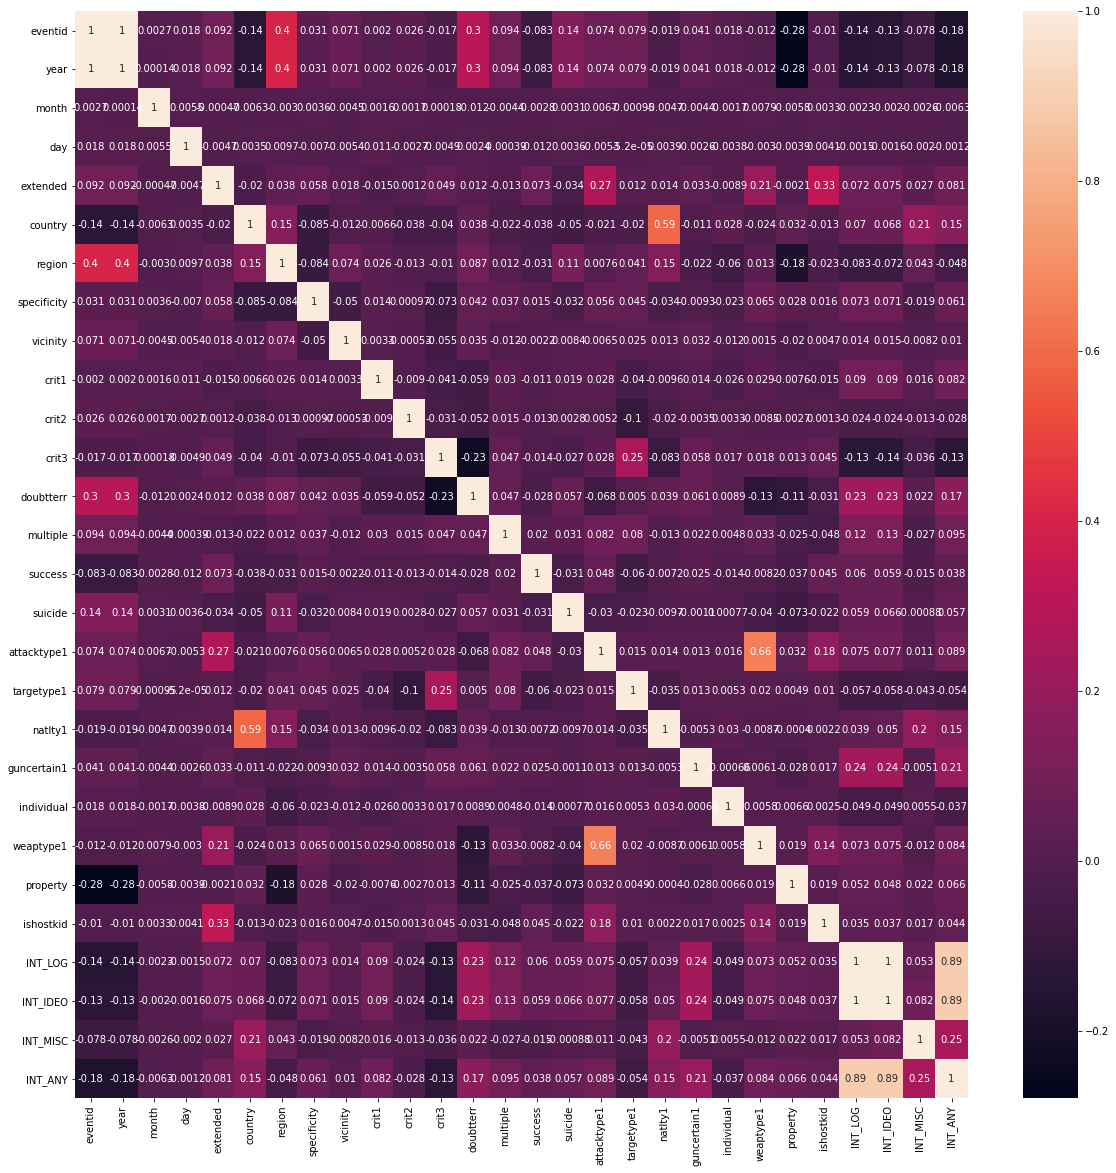

In [127]:
plt.figure(figsize = (20,20))
sb.heatmap(terrorism.corr(), annot = True);

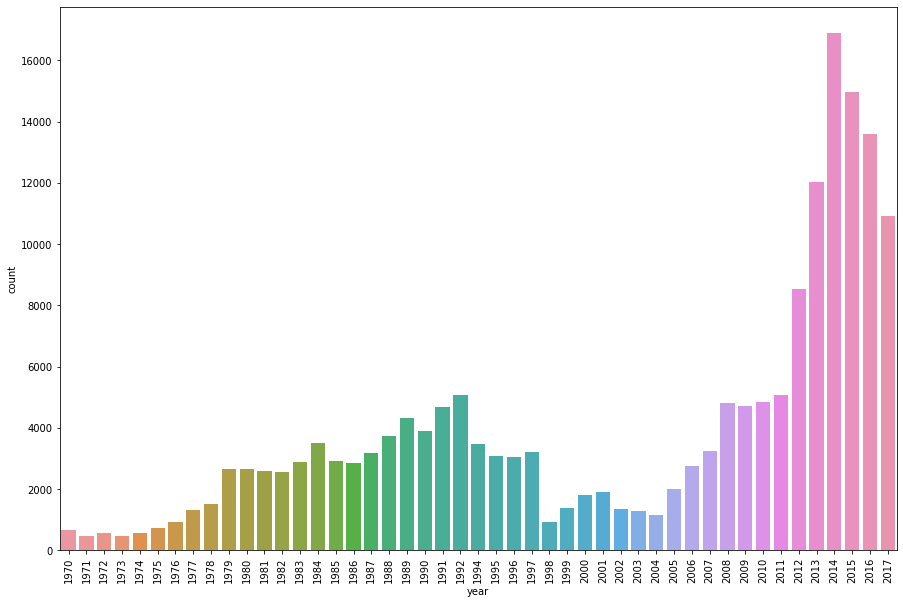

In [128]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
sb.countplot(x = "year", data = terrorism);

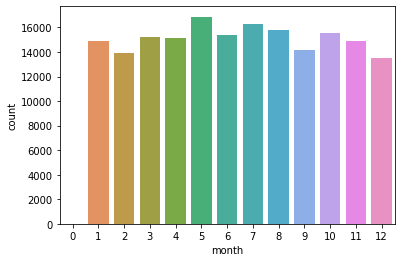

In [129]:
sb.countplot(x = "month", data = terrorism);

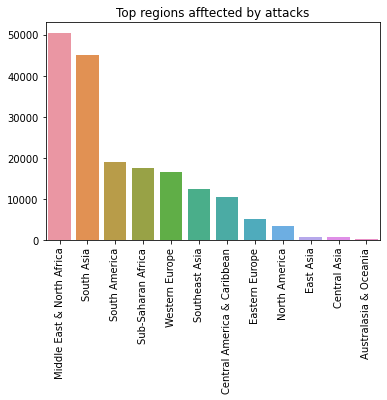

In [130]:
regions = terrorism["region_txt"].value_counts().index
attacks = terrorism["region_txt"].value_counts().values
plt.title("Top regions afftected by attacks")
plt.xticks(rotation = 90)
sb.barplot(x = regions, y = attacks, data = terrorism);

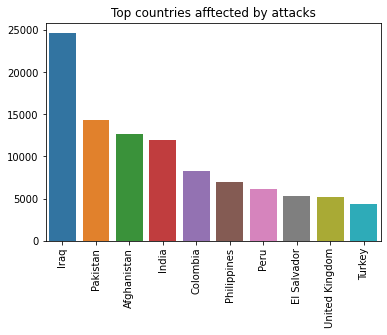

In [131]:
countries = terrorism["country_txt"].value_counts()[:10].index
attacks = terrorism["country_txt"].value_counts()[:10].values
plt.title("Top countries afftected by attacks")
plt.xticks(rotation = 90)
sb.barplot(x = countries, y = attacks, data = terrorism);

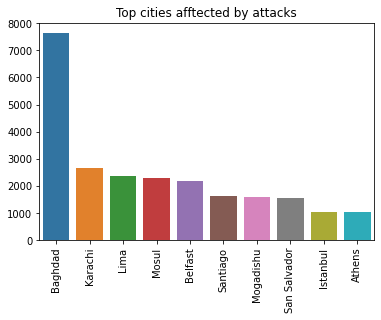

In [132]:
cities = terrorism["city"].value_counts()[1:11].index
attacks = terrorism["city"].value_counts()[1:11].values
plt.title("Top cities afftected by attacks")
plt.xticks(rotation = 90)
sb.barplot(x = cities, y = attacks, data = terrorism);

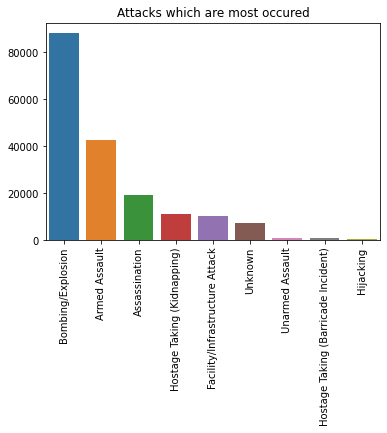

In [133]:
attack_type = terrorism["attacktype1_txt"].value_counts()
plt.title("Attacks which are most occured")
plt.xticks(rotation = 90)
sb.barplot(x = attack_type.index, y = attack_type.values, data = terrorism);

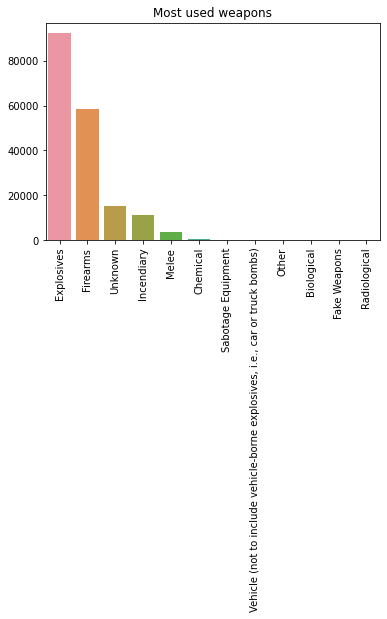

In [134]:
weapons = terrorism["weaptype1_txt"].value_counts()
plt.title("Most used weapons")
plt.xticks(rotation = 90)
sb.barplot(x = weapons.index, y = weapons.values, data = terrorism);

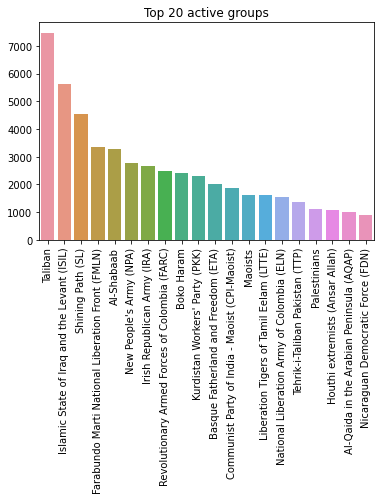

In [135]:
groups = terrorism["gname"].value_counts()[1:21]
plt.title("Top 20 active groups")
plt.xticks(rotation = 90)
sb.barplot(x = groups.index, y = groups.values, data = terrorism);

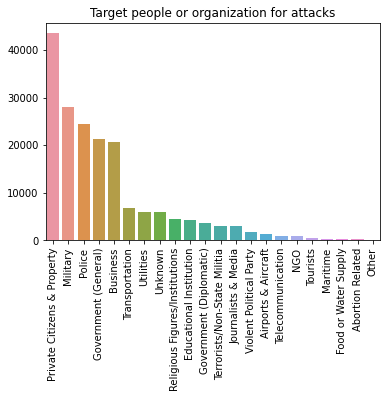

In [136]:
target = terrorism["targetype1_txt"].value_counts()
plt.title("Target people or organization for attacks")
plt.xticks(rotation = 90)
sb.barplot(x = target.index, y = target.values);

## **Conclusion:**



*   **Most affected Country:** Iraq
*   **Most affected City:** Baghdad
*   **Most affected Region:** Middle East & North Africa
*   **Most attacks occured:** Bombing/Explosive
*   **Weapons used most no. times:** Explosives 
*   **Most active Group:** Taliban
*   **Most Target People:** Private people and citizen